In [2]:
import pandas as pd 
import numpy as np 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

In [4]:
df = pd.read_csv('ks-projects-201801.csv')

In [5]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [7]:
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [10]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])

df['launched_year'] = df['launched'].apply(lambda time: time.year)
df['launched_month'] = df['launched'].apply(lambda time: time.month)
df['deadline_year'] = df['deadline'].apply(lambda time: time.year)
df['deadline_month'] = df['deadline'].apply(lambda time: time.month)

In [11]:
df.sample(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,deadline_year,deadline_month
161280,1820351995,A Social State Music Video: A Zombie Trash the...,Music Videos,Film & Video,USD,2014-10-05,2000.0,2014-09-05 21:22:31,520.0,failed,20,US,520.00,520.00,2000.00,2014,9,2014,10
90958,1462248110,Arjuna Card Game - Conquer the Battle of Every...,Playing Cards,Games,USD,2017-06-11,1200.0,2017-05-12 23:43:13,179.0,failed,8,US,26.00,179.00,1200.00,2017,5,2017,6
165442,1841761543,SYSTOLE,Video Games,Games,USD,2015-09-04,55000.0,2015-08-06 01:27:39,1246.0,failed,33,US,1246.00,1246.00,55000.00,2015,8,2015,9
256954,376631036,55mm D20 Monster Mega Countdown Dice,Tabletop Games,Games,USD,2017-10-21,1000.0,2017-09-26 18:11:01,4467.0,successful,251,US,789.00,4467.00,1000.00,2017,9,2017,10
110217,1560110415,Dreamcamp innovation I,Art,Art,NOK,2015-10-05,10000000.0,2015-09-05 14:44:49,200.0,failed,2,NO,24.15,24.73,1236414.89,2015,9,2015,10
288577,538412083,Tipton's Niptons Nipple Pasties,Product Design,Design,USD,2015-02-14,3333.0,2015-01-27 05:29:48,140.0,failed,6,US,140.00,140.00,3333.00,2015,1,2015,2
209822,206937436,Bubble-T : the electric flying vehicle,Flight,Technology,EUR,2015-07-17,3000.0,2015-06-17 21:44:27,2041.0,failed,3,FR,2300.49,2222.44,3266.69,2015,6,2015,7
40501,120601501,"World's Best Travel Bag & Jacket (Sports, Mult...",Product Design,Design,USD,2016-12-01,7500.0,2016-11-10 14:01:08,6620.0,canceled,44,US,1173.00,6620.00,7500.00,2016,11,2016,12
61392,1312342328,Charlotte Sophia,Theater,Theater,USD,2011-11-01,16500.0,2011-09-23 00:00:12,2646.0,failed,21,US,2646.00,2646.00,16500.00,2011,9,2011,11
211842,2079837811,"Gender Equality DW Cosmetics, Pigmented Eyesha...",Art,Art,GBP,2017-07-20,15000.0,2017-06-10 02:49:49,25.0,failed,1,GB,32.39,32.48,19487.86,2017,6,2017,7


In [12]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,deadline_year,deadline_month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,2015,10
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,2017,11
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,2013,2
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,2012,4
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,2015,8


In [13]:
def data_describe_num(col):
    print('Count       :', len(df[col]))
    print('Mean        :', np.mean(df[col]))
    print('Std         :', np.std(df[col]))
    print('Min         :', np.min(df[col]))
    print('Q1          :', np.percentile(df[col], 25))
    print('Median(Q2)  :', np.median(df[col]))
    print('Q3          :', np.percentile(df[col], 75))
    print('Max         :', np.max(df[col]))
    print('Mode        :', stats.mode(df[col]))
    

In [14]:
def data_describe_obj(col):
    print('Unique      :', df[col].nunique()) 
    print('Mode        :', stats.mode(df[col]))

In [15]:
data_describe_obj('category')

Unique      : 159
Mode        : ModeResult(mode=array(['Product Design'], dtype=object), count=array([22310]))


In [16]:
df['category'].value_counts()

Product Design     22310
Documentary        16138
Tabletop Games     14178
Music              13340
Shorts             12357
                   ...  
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, Length: 159, dtype: int64

In [17]:
data_describe_obj('main_category')

Unique      : 15
Mode        : ModeResult(mode=array(['Film & Video'], dtype=object), count=array([62696]))


In [18]:
data_describe_num('usd_pledged_real')

Count       : 374860
Mean        : 9120.898548951884
Std         : 91319.57262540108
Min         : 0.0
Q1          : 31.0
Median(Q2)  : 624.495
Q3          : 4050.895
Max         : 20338986.27
Mode        : ModeResult(mode=array([0.]), count=array([51808]))


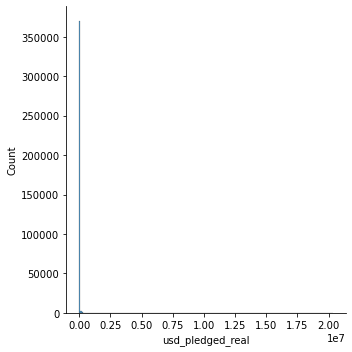

In [19]:
sns.displot(df['usd_pledged_real'],kde=False,bins=200)

In [20]:
df['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

<AxesSubplot:xlabel='state', ylabel='count'>

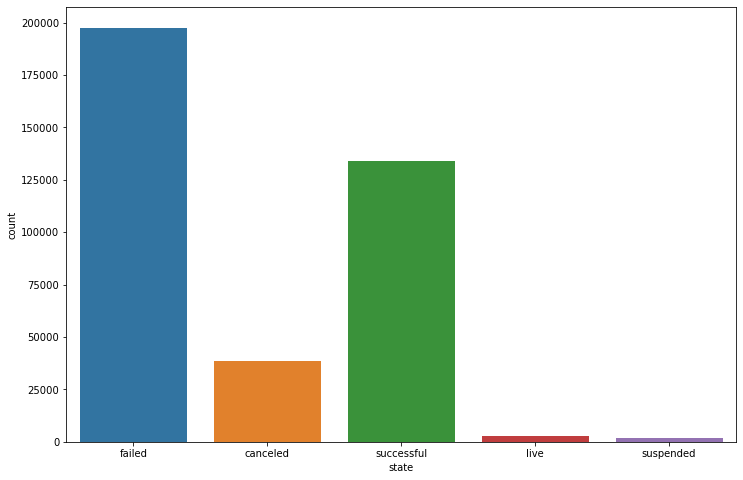

In [21]:
sns.countplot(data=df,x='state')

In [22]:
df['country'].nunique()

22

<AxesSubplot:xlabel='country', ylabel='count'>

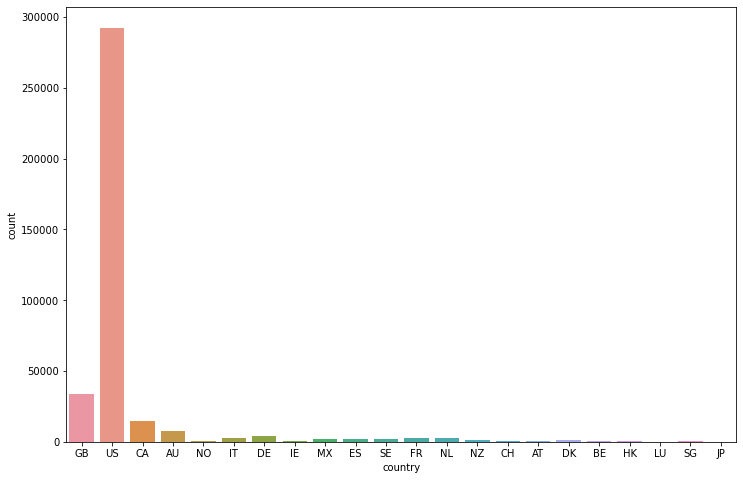

In [23]:
sns.countplot(data=df,x='country')

<AxesSubplot:xlabel='launched_year', ylabel='count'>

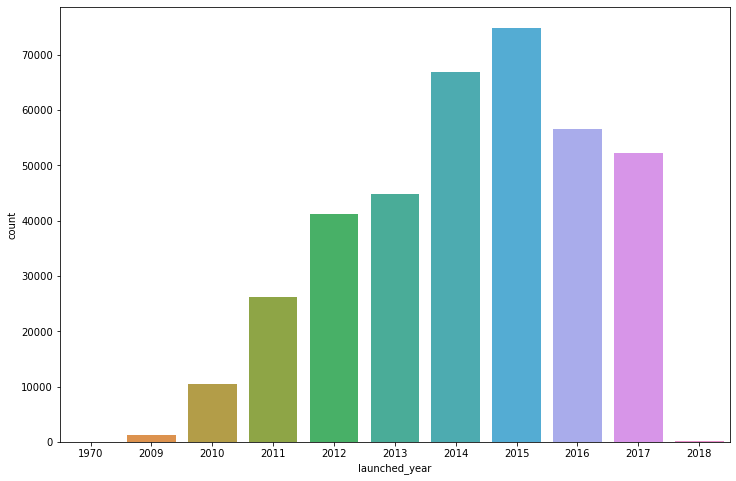

In [24]:
sns.countplot(data=df,x='launched_year')

<AxesSubplot:xlabel='launched_month', ylabel='count'>

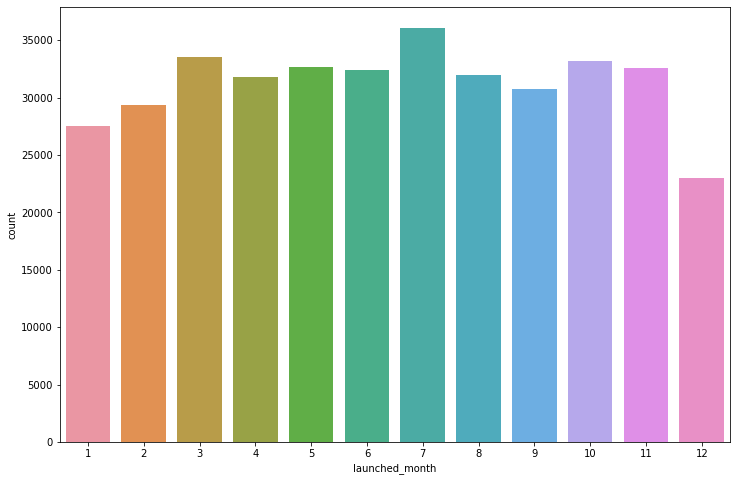

In [25]:
sns.countplot(data=df,x='launched_month')

<AxesSubplot:xlabel='deadline_year', ylabel='count'>

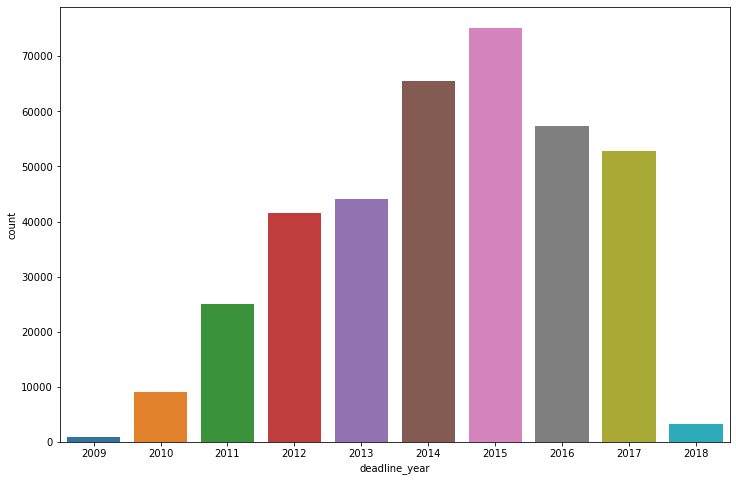

In [26]:
sns.countplot(data=df,x='deadline_year')

In [27]:
df['usd_pledged_real'].value_counts().head(10)

0.0      51808
1.0       6557
10.0      3605
25.0      3423
50.0      2915
5.0       2564
100.0     2436
20.0      2340
2.0       1676
30.0      1642
Name: usd_pledged_real, dtype: int64

In [28]:
df.groupby('category')['usd_pledged_real'].mean().sort_values(ascending=False).head(20)

category
Camera Equipment     81362.319880
3D Printing          66399.119575
Sound                61878.248445
Wearables            56284.998240
Fabrication Tools    48192.981440
Hardware             42535.324902
Gaming Hardware      40089.047780
Tabletop Games       32707.057014
Robots               32612.975594
Space Exploration    30611.282012
Gadgets              30519.855868
Flight               28621.467817
Product Design       28551.397732
DIY Electronics      22351.087062
Typography           21263.774907
Technology           20519.187205
Video Games          18281.700242
Chiptune             17691.527143
Design               17522.726502
Footwear             16291.717508
Name: usd_pledged_real, dtype: float64

In [29]:
df.groupby('category')['usd_pledged_real'].sum().sort_values(ascending=False).head(20)

category
Product Design      6.369817e+08
Tabletop Games      4.637207e+08
Video Games         2.162360e+08
Hardware            1.557644e+08
Technology          1.421364e+08
Documentary         1.389153e+08
Gadgets             9.049137e+07
Design              7.357793e+07
Food                7.069171e+07
Wearables           6.939940e+07
Music               6.349534e+07
Narrative Film      5.458915e+07
Fashion             4.678446e+07
Film & Video        4.540003e+07
3D Printing         4.528420e+07
Shorts              4.154866e+07
Sound               4.139655e+07
Apparel             3.914980e+07
Camera Equipment    3.384673e+07
Comics              3.265802e+07
Name: usd_pledged_real, dtype: float64

<AxesSubplot:xlabel='category'>

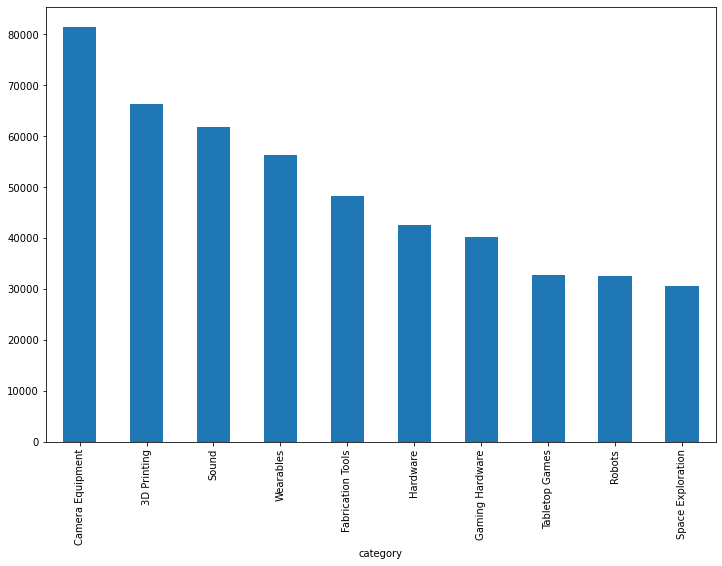

In [30]:
df.groupby('category')['usd_pledged_real'].mean().sort_values(ascending=False).head(10).plot.bar()

In [31]:
df.groupby('main_category')['usd_pledged_real'].mean().sort_values(ascending=False)

main_category
Design          24419.827975
Technology      21070.369202
Games           21043.934662
Comics           6610.443828
Film & Video     6218.197467
Fashion          5712.865119
Food             5114.282154
Theater          4006.045016
Music            3911.548999
Photography      3572.220982
Dance            3453.809894
Publishing       3390.641286
Art              3221.093567
Journalism       2615.789125
Crafts           1632.907282
Name: usd_pledged_real, dtype: float64

<AxesSubplot:xlabel='main_category'>

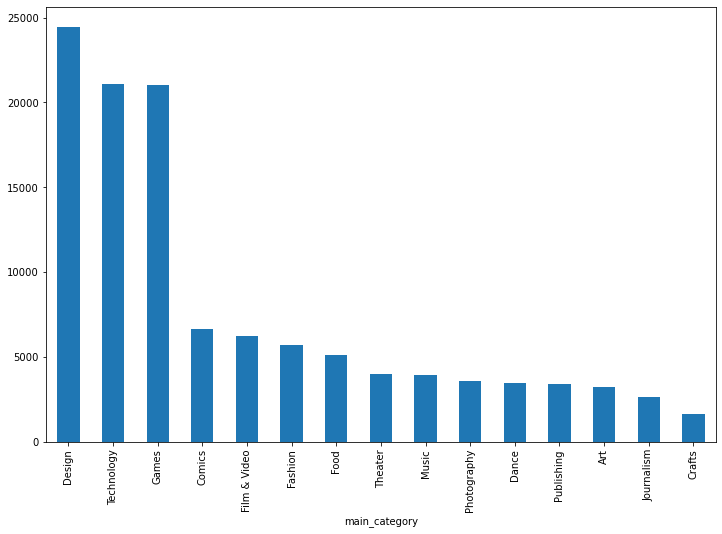

In [32]:
df.groupby('main_category')['usd_pledged_real'].mean().sort_values(ascending=False).plot.bar()

In [33]:
df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending=False)

main_category
Games           7.412726e+08
Design          7.342065e+08
Technology      6.860934e+08
Film & Video    3.898561e+08
Music           1.937390e+08
Publishing      1.335201e+08
Fashion         1.303219e+08
Food            1.258062e+08
Art             9.068023e+07
Comics          7.151839e+07
Theater         4.371396e+07
Photography     3.850140e+07
Crafts          1.438428e+07
Dance           1.301050e+07
Journalism      1.243546e+07
Name: usd_pledged_real, dtype: float64

<AxesSubplot:xlabel='main_category'>

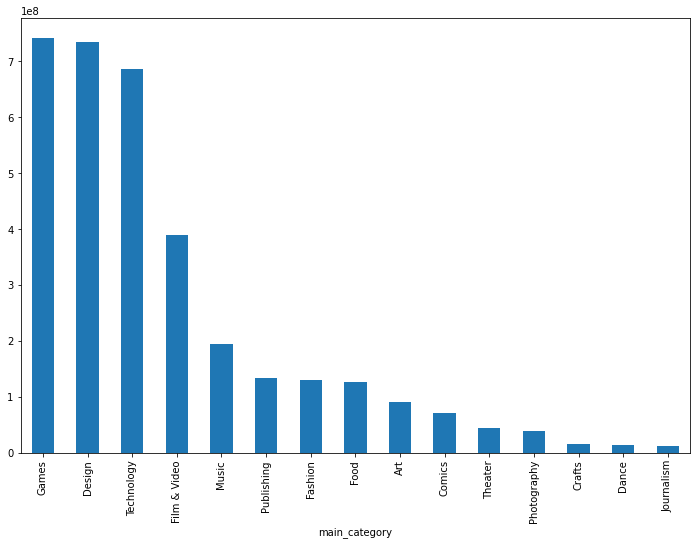

In [41]:
df.groupby('main_category')['usd_pledged_real'].sum().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='main_category', ylabel='usd_pledged_real'>

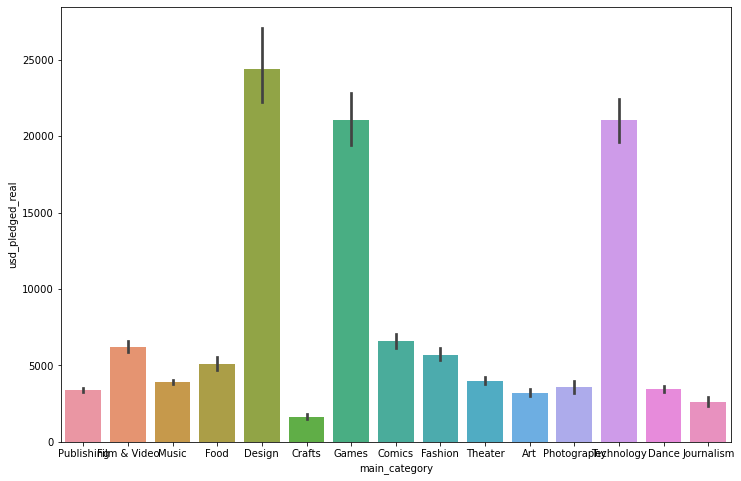

In [43]:
sns.barplot(x='main_category',y='usd_pledged_real',data=df)

<AxesSubplot:xlabel='country', ylabel='usd_pledged_real'>

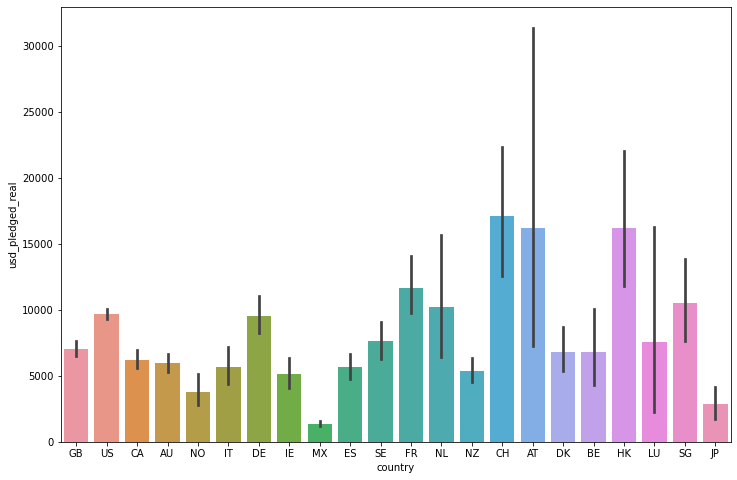

In [44]:
sns.barplot(x='country',y='usd_pledged_real',data=df)

In [36]:
df.groupby('country')['usd_pledged_real'].mean().sort_values(ascending=False)

country
CH    17155.217096
HK    16228.940032
AT    16190.600603
FR    11690.203409
SG    10536.136523
NL    10197.038870
US     9670.291095
DE     9536.387924
SE     7635.630569
LU     7559.284839
GB     7026.433109
DK     6813.352713
BE     6777.240827
CA     6220.748131
AU     5962.128806
IT     5693.546668
ES     5688.775738
NZ     5405.330124
IE     5163.085709
NO     3769.410565
JP     2897.210250
MX     1387.002568
Name: usd_pledged_real, dtype: float64

<AxesSubplot:xlabel='country', ylabel='usd_pledged_real'>

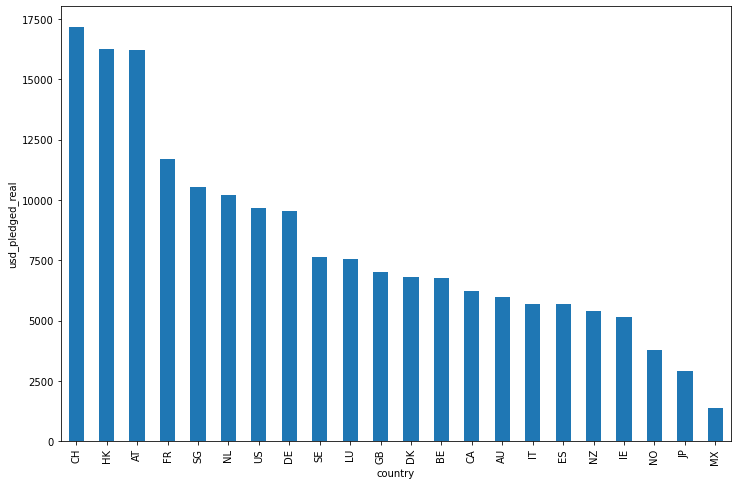

In [56]:
df.groupby('country')['usd_pledged_real'].mean().sort_values(ascending=False).plot.bar(ylabel='usd_pledged_real')

In [38]:
df.groupby('country')['usd_pledged_real'].sum().sort_values(ascending=False)

country
US    2.829759e+09
GB    2.365870e+08
CA    9.179336e+07
AU    4.673713e+07
DE    3.977627e+07
FR    3.435751e+07
NL    2.924511e+07
IT    1.638603e+07
SE    1.341580e+07
CH    1.305512e+07
ES    1.294765e+07
HK    1.002948e+07
AT    9.665789e+06
NZ    7.821513e+06
DK    7.583262e+06
SG    5.847556e+06
IE    4.187263e+06
BE    4.181558e+06
NO    2.668743e+06
MX    2.430029e+06
LU    4.686757e+05
JP    1.158884e+05
Name: usd_pledged_real, dtype: float64

<AxesSubplot:xlabel='country'>

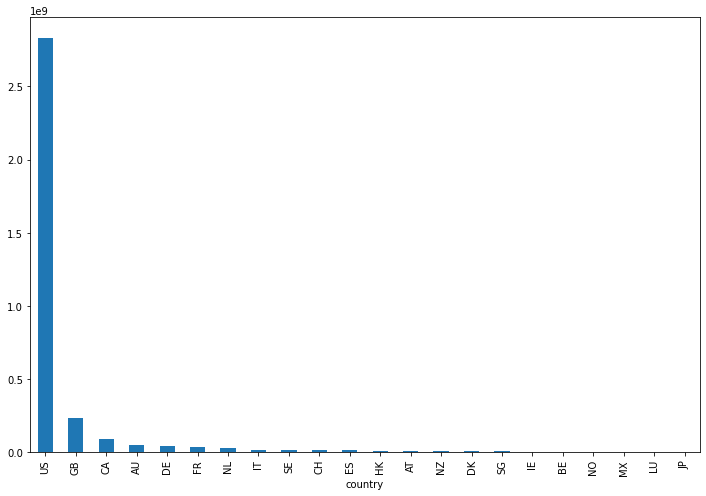

In [47]:
df.groupby('country')['usd_pledged_real'].sum().sort_values(ascending=False).plot.bar()

In [39]:

df.groupby('launched_month')['usd_pledged_real'].sum().sort_values(ascending=False)

launched_month
5     3.376397e+08
11    3.295122e+08
10    3.291370e+08
7     3.230498e+08
9     3.208969e+08
3     3.194561e+08
6     2.991560e+08
4     2.953899e+08
2     2.683136e+08
8     2.498201e+08
1     2.100283e+08
12    1.366602e+08
Name: usd_pledged_real, dtype: float64

<AxesSubplot:xlabel='launched_month'>

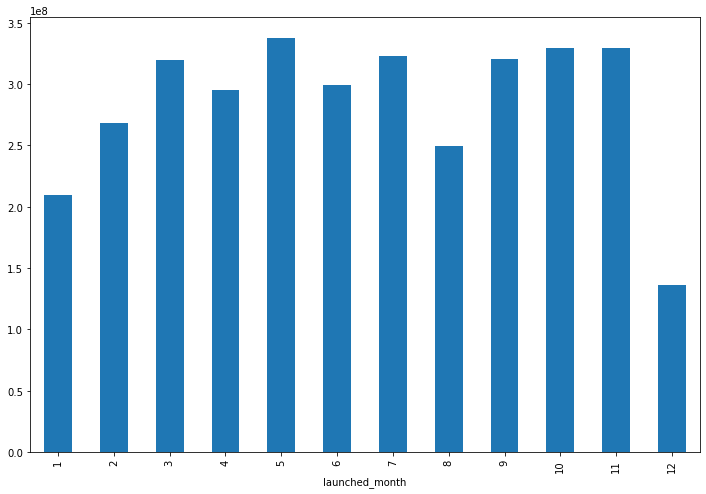

In [46]:
df.groupby('launched_month')['usd_pledged_real'].sum().plot.bar()

In [48]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,deadline_year,deadline_month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,2015,10
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,2017,11
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,2013,2
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,2012,4
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,2015,8


<AxesSubplot:xlabel='main_category', ylabel='count'>

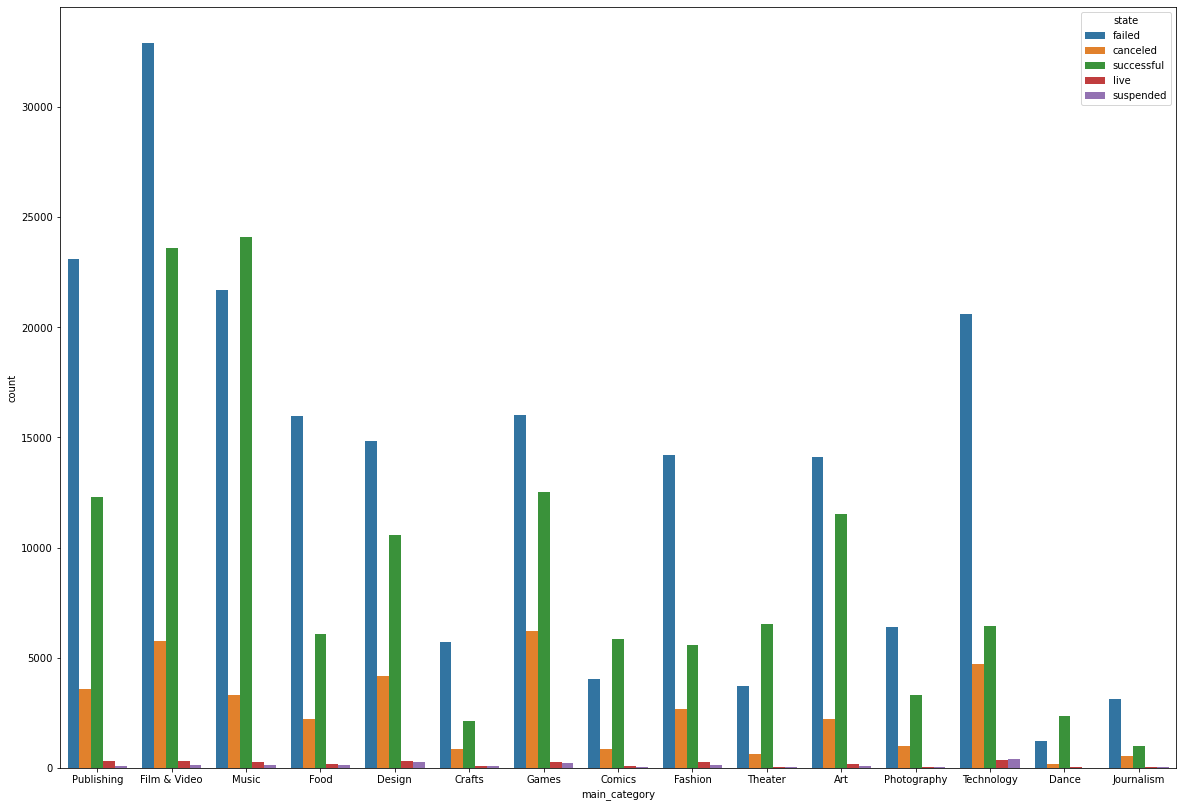

In [55]:
plt.figure(figsize=(20,14))
sns.countplot(data=df,x='main_category',hue='state')

<AxesSubplot:xlabel='main_category', ylabel='count'>

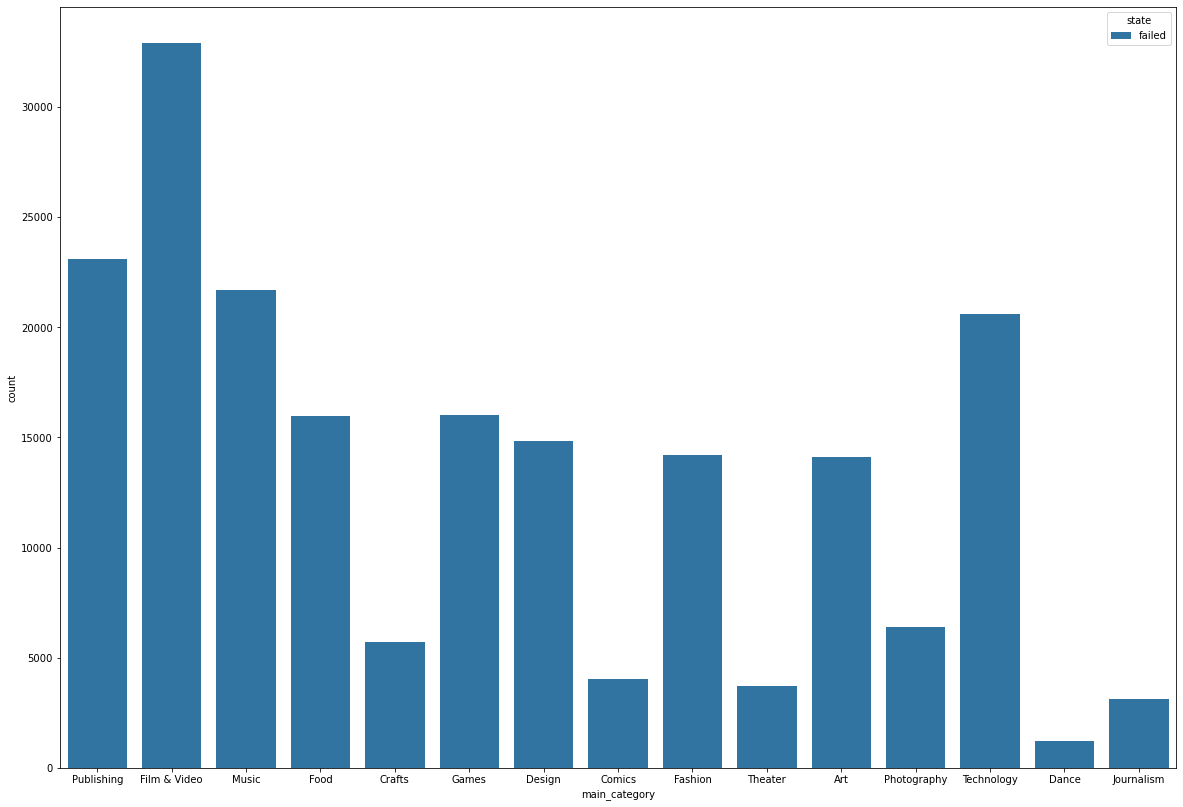

In [58]:
plt.figure(figsize=(20,14))
sns.countplot(x='main_category',data=df.loc[df['state'] == 'failed'],hue='state')

<AxesSubplot:xlabel='main_category', ylabel='count'>

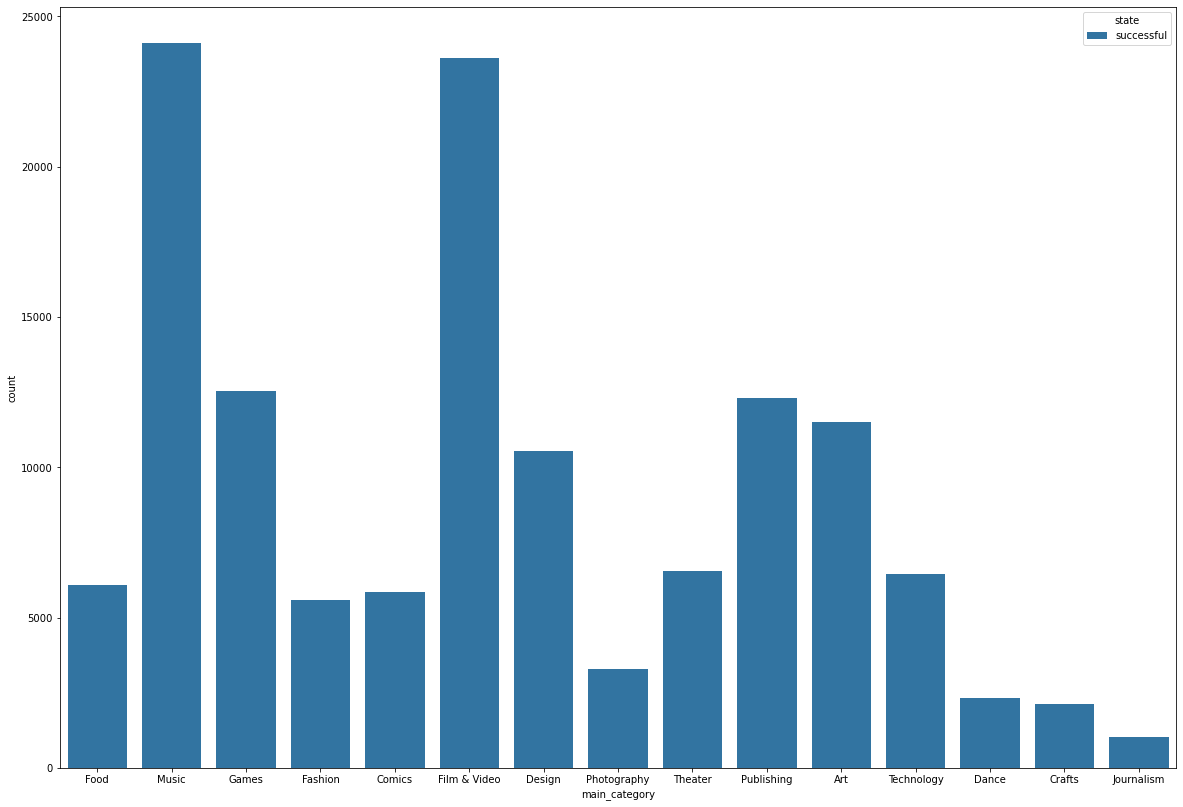

In [59]:
plt.figure(figsize=(20,14))
sns.countplot(x='main_category',data=df.loc[df['state'] == 'successful'],hue='state')

In [65]:
df_failed = df.loc[df['state'] == 'failed']

<AxesSubplot:xlabel='main_category', ylabel='count'>

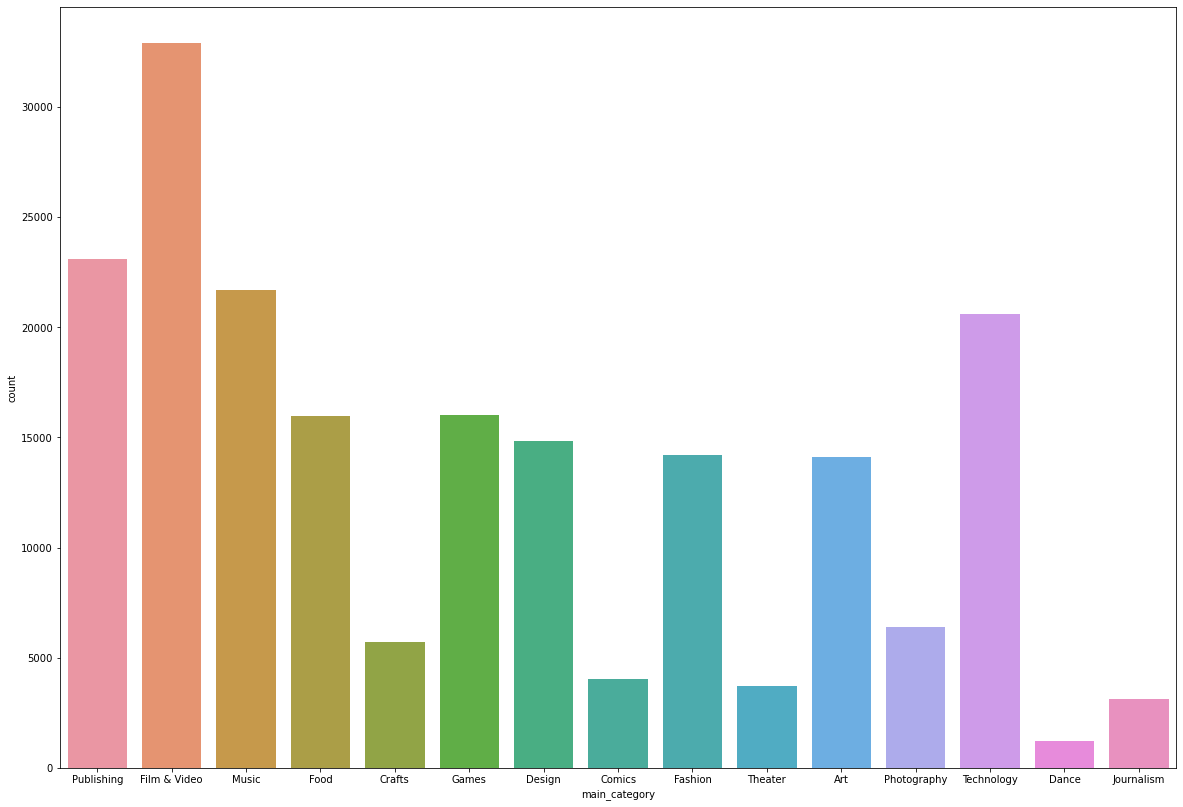

In [66]:
plt.figure(figsize=(20,14))
sns.countplot(x='main_category',data=df_failed)

In [67]:
df_successful = df.loc[df['state'] == 'successful']

<AxesSubplot:xlabel='main_category', ylabel='count'>

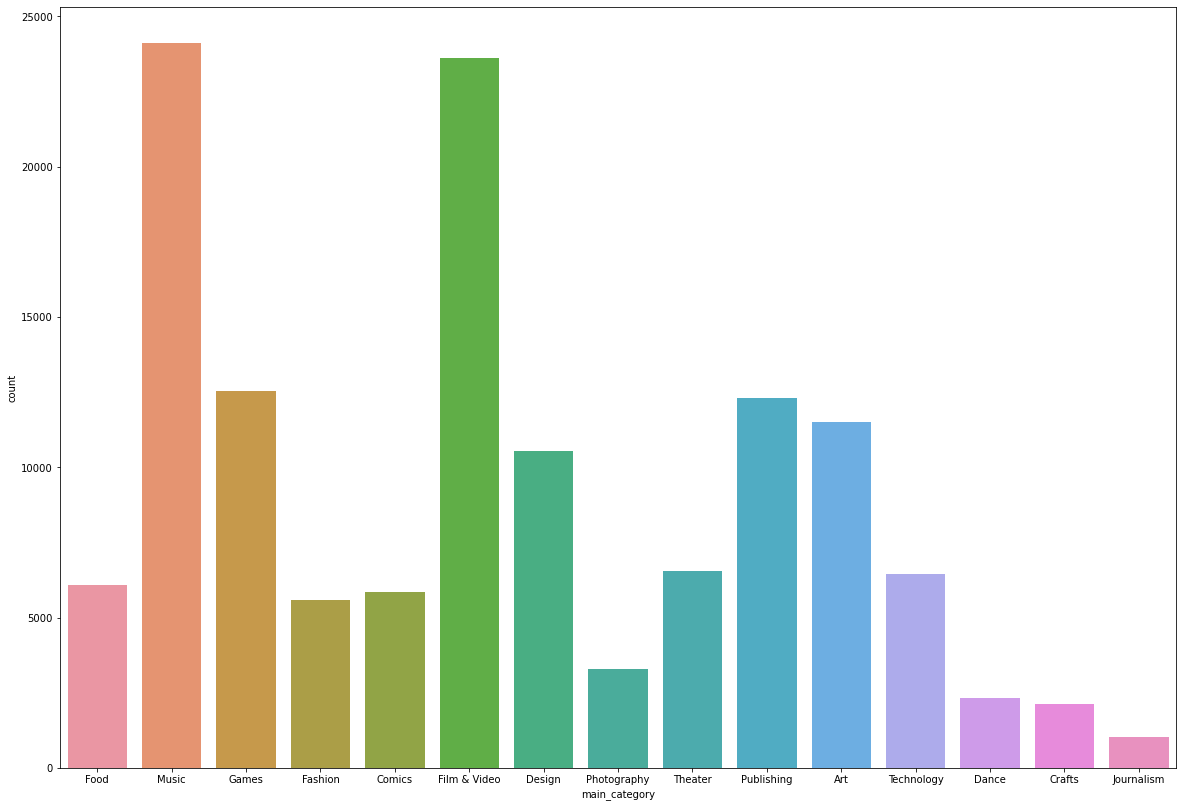

In [70]:
plt.figure(figsize=(20,14))
sns.countplot(x='main_category',data=df_successful,orient='v')

In [73]:
df_failed['main_category'].value_counts()

Film & Video    32891
Publishing      23113
Music           21696
Technology      20613
Games           16002
Food            15969
Design          14814
Fashion         14181
Art             14130
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3136
Dance            1235
Name: main_category, dtype: int64

In [75]:
df_successful['main_category'].value_counts()

Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

In [78]:
df.sort_values('usd_pledged_real',ascending=False).head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,deadline_year,deadline_month
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0,2015,2,2015,3
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,13285226.36,50000.0,2014,7,2014,8
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,12779843.49,1000000.0,2016,5,2016,6
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,19264,US,5228482.00,12393139.69,100000.0,2016,11,2017,1
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,10266845.74,100000.0,2012,4,2012,5
293861,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,20000.0,2015-07-07 13:52:34,9192055.66,successful,44949,US,9192055.66,9192055.66,20000.0,2015,7,2015,9
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0,2015,1,2015,2
6665,1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,950000.0,2012-07-10 14:44:41,8596474.58,successful,63416,US,8596474.58,8596474.58,950000.0,2012,7,2012,8
309630,647013276,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Tabletop Games,Games,USD,2017-10-19,40000.0,2017-09-26 20:00:02,7072757.00,successful,43733,US,1574139.50,7072757.00,40000.0,2017,9,2017,10
271276,450099426,"The Everyday Backpack, Tote, and Sling",Product Design,Design,USD,2016-09-10,500000.0,2016-07-13 00:47:35,6565782.50,successful,26359,US,1462611.00,6565782.50,500000.0,2016,7,2016,9


In [79]:
df_successful.sort_values('usd_pledged_real',ascending=False).head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,deadline_year,deadline_month
157270,1799979574,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,Design,USD,2015-03-28,500000.0,2015-02-24 15:44:42,20338986.27,successful,78471,US,20338986.27,20338986.27,500000.0,2015,2,2015,3
250254,342886736,COOLEST COOLER: 21st Century Cooler that's Act...,Product Design,Design,USD,2014-08-30,50000.0,2014-07-08 10:14:37,13285226.36,successful,62642,US,13285226.36,13285226.36,50000.0,2014,7,2014,8
216629,2103598555,"Pebble 2, Time 2 + All-New Pebble Core",Product Design,Design,USD,2016-06-30,1000000.0,2016-05-24 15:49:52,12779843.49,successful,66673,US,12779843.49,12779843.49,1000000.0,2016,5,2016,6
289915,545070200,Kingdom Death: Monster 1.5,Tabletop Games,Games,USD,2017-01-08,100000.0,2016-11-25 06:01:41,12393139.69,successful,19264,US,5228482.00,12393139.69,100000.0,2016,11,2017,1
282416,506924864,Pebble: E-Paper Watch for iPhone and Android,Product Design,Design,USD,2012-05-19,100000.0,2012-04-11 06:59:04,10266845.74,successful,68929,US,10266845.74,10266845.74,100000.0,2012,4,2012,5
293861,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Product Design,Design,USD,2015-09-03,20000.0,2015-07-07 13:52:34,9192055.66,successful,44949,US,9192055.66,9192055.66,20000.0,2015,7,2015,9
187652,1955357092,Exploding Kittens,Tabletop Games,Games,USD,2015-02-20,10000.0,2015-01-20 19:00:19,8782571.99,successful,219382,US,8782571.99,8782571.99,10000.0,2015,1,2015,2
6665,1033978702,OUYA: A New Kind of Video Game Console,Gaming Hardware,Games,USD,2012-08-09,950000.0,2012-07-10 14:44:41,8596474.58,successful,63416,US,8596474.58,8596474.58,950000.0,2012,7,2012,8
309630,647013276,"THE 7th CONTINENT – What Goes Up, Must Come Down.",Tabletop Games,Games,USD,2017-10-19,40000.0,2017-09-26 20:00:02,7072757.00,successful,43733,US,1574139.50,7072757.00,40000.0,2017,9,2017,10
271276,450099426,"The Everyday Backpack, Tote, and Sling",Product Design,Design,USD,2016-09-10,500000.0,2016-07-13 00:47:35,6565782.50,successful,26359,US,1462611.00,6565782.50,500000.0,2016,7,2016,9


In [80]:
df_failed.sort_values('usd_pledged_real',ascending=False).head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,deadline_year,deadline_month
55335,1281558052,The Purpose Hotel: Change the World in Your Sleep,Design,Design,USD,2016-09-03,2000000.0,2016-07-19 16:25:24,757352.94,failed,5338,US,15183.00,757352.94,2000000.00,2016,7,2016,9
174528,1887558032,Crowdfunding Rebel Alliance X-Wing Squadron,Hardware,Technology,USD,2013-04-01,11000000.0,2013-02-09 01:56:30,721036.46,failed,643,US,721036.46,721036.46,11000000.00,2013,2,2013,4
112067,1569310517,CENTR: Interactive Panoramic Video in the Palm...,Camera Equipment,Technology,USD,2014-05-30,900000.0,2014-04-30 17:59:35,607628.38,failed,2062,US,607628.38,607628.38,900000.00,2014,4,2014,5
105355,1535499985,Bruvelo. Simplify and elevate your coffee.,Product Design,Design,USD,2015-10-30,975000.0,2015-09-01 15:37:15,528921.00,failed,1832,US,528921.00,528921.00,975000.00,2015,9,2015,10
330579,754083452,RED ASH - The Indelible Legend,Video Games,Games,USD,2015-08-03,800000.0,2015-07-04 20:30:24,519999.59,failed,6550,US,519999.59,519999.59,800000.00,2015,7,2015,8
236742,273466984,Kickstarter Open Source Death Star,Hardware,Technology,GBP,2013-04-01,20000000.0,2013-02-05 02:26:22,328613.96,failed,2388,GB,516318.42,500951.19,30488734.41,2013,2,2013,4
125781,1638510182,Pantheon: Rise of the Fallen,Video Games,Games,USD,2014-02-22,800000.0,2014-01-13 20:40:41,460657.02,failed,3157,US,460657.02,460657.02,800000.00,2014,1,2014,2
269884,443272157,Zafirro. Sapphire Blade Razor.,Technology,Technology,USD,2016-08-10,1000000.0,2016-07-11 17:00:34,431484.00,failed,3404,US,51347.00,431484.00,1000000.00,2016,7,2016,8
322099,710197339,PROJECT AWAKENED,Video Games,Games,USD,2013-03-06,500000.0,2013-02-04 16:40:00,338498.30,failed,6287,US,338498.30,338498.30,500000.00,2013,2,2013,3
211044,2075570421,Shadow of the Eternals,Video Games,Games,USD,2013-08-24,750000.0,2013-07-25 17:00:53,323950.60,failed,5932,US,323950.60,323950.60,750000.00,2013,7,2013,8


In [81]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_year,launched_month,deadline_year,deadline_month
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,2015,8,2015,10
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,9,2017,11
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,2013,1,2013,2
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,2012,3,2012,4
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,7,2015,8
